# Análise Exploratória

In [8]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Leitura dos datasets

In [9]:
local = "..\\dataset\\incoming\\"

In [10]:
# leitura dos datasets
customers = pd.read_csv(local+"olist_customers_dataset.csv")
order_items = pd.read_csv(local+"olist_order_items_dataset.csv")
order_payments = pd.read_csv(local+"olist_order_payments_dataset.csv")
orders = pd.read_csv(local+"olist_orders_dataset.csv")
products = pd.read_csv(local+"olist_products_dataset.csv")
sellers = pd.read_csv(local+"olist_sellers_dataset.csv")
reviews = pd.read_csv(local+"olist_order_reviews_dataset.csv")

In [11]:
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [12]:
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.9,19.93


In [13]:
order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [14]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [15]:
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [16]:
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [17]:
reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


## Análises Univariadas [Thais]

In [54]:
dfs = {"customers": customers, "sellers": sellers, "products": products, "orders": orders, "order_items": order_items, "order_payments": order_payments, "reviews": reviews}

In [55]:
# verificando a existência de linhas nulas
for names, tables in dfs.items():
    print(f"{names}\n-----linhas nulas:\n{dfs[names].isna().sum()}\n\n-----tipo de dado:\n{dfs[names].dtypes}\n---------------\n\n")

customers
-----linhas nulas:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

-----tipo de dado:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object
---------------


sellers
-----linhas nulas:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

-----tipo de dado:
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object
---------------


products
-----linhas nulas:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_lengt

In [56]:
# deletando linhas nulas
for names, tables in dfs.items():
    print(f"{names}\n-----deletando linhas\n")
    dfs[names].dropna(axis=0, inplace=True)

customers
-----deletando linhas

sellers
-----deletando linhas

products
-----deletando linhas

orders
-----deletando linhas

order_items
-----deletando linhas

order_payments
-----deletando linhas

reviews
-----deletando linhas



In [46]:
customers[["customer_city", "customer_state"]].describe()

,customer_city,customer_state
count,99441,99441
unique,4119,27
top,sao paulo,SP
freq,15540,41746


In [50]:
sellers[["seller_city", "seller_state"]].describe()

,seller_city,seller_state
count,3095,3095
unique,611,23
top,sao paulo,SP
freq,694,1849


In [62]:
products[["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]].describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000
mean,2276.956586,30.854545,16.958813,23.208596
std,4279.291845,16.955965,13.636115,12.078762
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


In [64]:
products[["product_category_name"]].describe()

,product_category_name
count,32340
unique,73
top,cama_mesa_banho
freq,3029


In [66]:
orders[["order_status"]].describe()

,order_status
count,96461
unique,2
top,delivered
freq,96455


In [48]:
order_items[["price", "freight_value"]].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [70]:
order_payments[["payment_type"]].describe()

,payment_type
count,103886
unique,5
top,credit_card
freq,76795


In [71]:
order_payments[["payment_value"]].describe()

,payment_value
count,103886.000000
mean,154.100380
std,217.494064
min,0.000000
25%,56.790000
50%,100.000000
75%,171.837500
max,13664.080000


## Análises Multivariadas [Aline]

### 1) Análise da relação entre valor do frete e a pontuação de avaliação:

- Objetivo: Entender como o frete afeta a satisfação do cliente.

In [18]:
order_items_reviews = order_items.merge(reviews, how='inner', on='order_id')
order_items_reviews.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


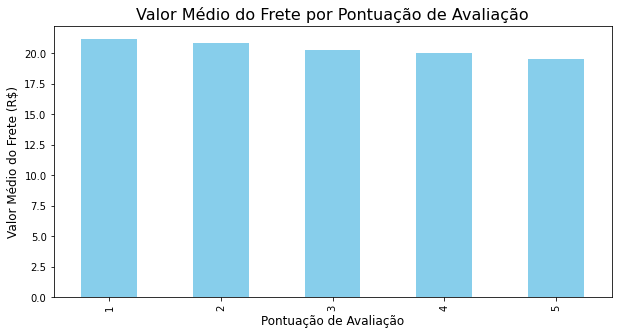

In [19]:
mean_freight_per_review = order_items_reviews.groupby('review_score')['freight_value'].mean()

plt.figure(figsize=(10, 5))
mean_freight_per_review.plot(kind='bar', color='skyblue')

plt.title('Valor Médio do Frete por Pontuação de Avaliação', fontsize=16)
plt.xlabel('Pontuação de Avaliação', fontsize=12)
plt.ylabel('Valor Médio do Frete (R$)', fontsize=12)

plt.show()

In [20]:
correlation = order_items_reviews['freight_value'].corr(order_items_reviews['review_score'])
print(f'Correlação entre Valor do Frete e Pontuação de Avaliação: {correlation}')

Correlação entre Valor do Frete e Pontuação de Avaliação: -0.03600619736517388


Não existem grandes variações no custo médio do frete para clientes que dão uma avaliação de 1 (avaliação ruim) em comparação com aqueles que dão uma avaliação de 5 (avaliação ótima).
Há uma leve tendência de diminuição no valor do frete médio conforme a pontuação de avaliação aumenta. Isso poderia sugerir que os clientes que pagam fretes ligeiramente mais altos podem estar menos satisfeitos, embora a diferença não seja drástica.
Ademais, o gráfico sugere não haver uma correlação forte entre o valor do frete e a pontuação de avaliação. Para conferir, realizamos o cálculo da correlação, a qual resultou em um valor próximo a zero (-0.0360), confirmando a baixa correlação. Assim, o valor do frete é bastante uniforme entre os diferentes grupos de avaliação, o que implica que o preço do frete pode não ser um fator determinante para a satisfação do cliente.

### 2) Impacto do tempo de entrega na avaliação do cliente:

- Objetivo: Verificar se a satisfação do cliente é afetada devido atrasos nas entregas.

In [21]:
orders_reviews = reviews.merge(orders, how='inner', on='order_id')
orders_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00


In [22]:
orders_reviews['order_delivered_customer_date'] = pd.to_datetime(orders_reviews['order_delivered_customer_date'])
orders_reviews['order_purchase_timestamp'] = pd.to_datetime(orders_reviews['order_purchase_timestamp'])
orders_reviews['delivery_time_days'] = (orders_reviews['order_delivered_customer_date'] - orders_reviews['order_purchase_timestamp']).dt.days

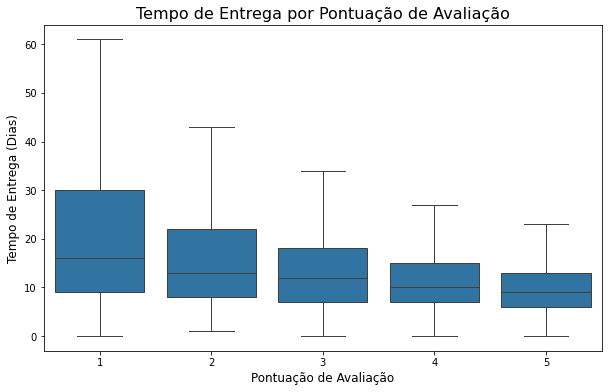

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_score', y='delivery_time_days', data=orders_reviews, showfliers=False)

plt.title('Tempo de Entrega por Pontuação de Avaliação', fontsize=16)
plt.xlabel('Pontuação de Avaliação', fontsize=12)
plt.ylabel('Tempo de Entrega (Dias)', fontsize=12)

plt.show()

Há uma clara tendência de diminuição do tempo de entrega conforme a pontuação de avaliação melhora. Ou seja, clientes que receberam suas encomendas mais rapidamente tendem a dar avaliações mais altas, enquanto tempos de entrega maiores estão mais associados a avaliações mais baixas. As avaliações mais baixas (1 e 2) têm medianas de tempo de entrega mais altas, indicando que o tempo médio de entrega é maior para esses grupos. Para pontuações mais altas (4 e 5), a mediana do tempo de entrega é significativamente menor, o que indica que tempos de entrega mais curtos e consistentes estão mais associados a avaliações positivas. Além disso, a dispersão (intervalo entre o primeiro e o terceiro quartil) das avaliações 1 e 2 é maior, mostrando uma variabilidade maior nos tempos de entrega, situação exatamente oposta às pontuações 4 e 5. Assim, o gráfico sugere que melhorar a velocidade e a consistência das entregas pode resultar em melhores avaliações.

### 4) Análise por categoria de produto e sua relação com preço, volume de vendas e avaliações:

- Objetivo: Entender quais categorias de produtos são mais populares e mais bem avaliadas, e como o preço varia entre elas.

In [24]:
products_order_items = order_items.merge(products, how='inner', on='product_id')
products_order_items.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [25]:
products_order_items_reviews = products_order_items.merge(reviews, how='inner', on='order_id')
products_order_items_reviews.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


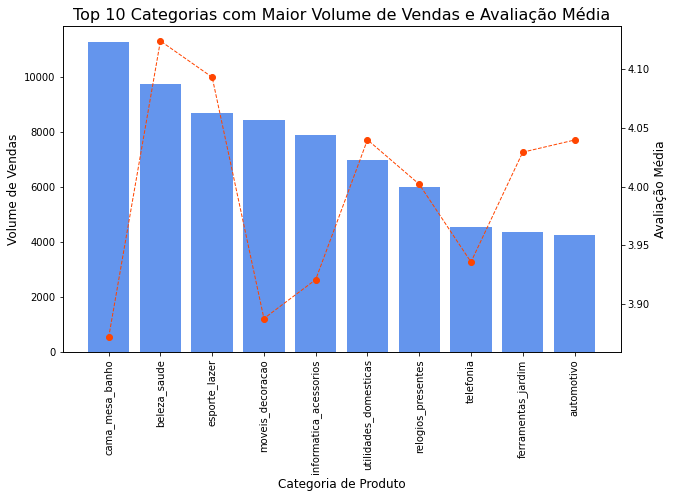

In [26]:
sales_per_category = products_order_items_reviews['product_category_name'].value_counts()
avg_review_per_category = products_order_items_reviews.groupby('product_category_name')['review_score'].mean()

top_categories = sales_per_category.nlargest(10).index
top_sales = sales_per_category[top_categories]
top_reviews = avg_review_per_category[top_categories]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(top_sales.index, top_sales.values, color='#6495ED', label='Volume de Vendas')
ax1.set_xlabel('Categoria de Produto', fontsize=12)
ax1.set_ylabel('Volume de Vendas', fontsize=12)
ax1.tick_params(axis='x', rotation=90)
ax1.set_title('Top 10 Categorias com Maior Volume de Vendas e Avaliação Média', fontsize=16)

ax2 = ax1.twinx()
ax2.plot(top_sales.index, top_reviews.values, color='#FF4500', marker='o', label='Avaliação Média', linestyle='--', linewidth=1)
ax2.grid(False)
ax2.set_ylabel('Avaliação Média', fontsize=12)

plt.show()

A análise mostra que embora cama_mesa_banho tenha o maior volume de vendas, a avaliação média dos clientes é baixa, sugerindo problemas na experiência de compra, como qualidade ou entrega. Já categorias como utilidades_domesticas, beleza_saude e esporte_lazer tem boas avaliações, mas um volume de vendas menor, o que pode ser uma oportunidade de crescimento. Melhorar a satisfação nas categorias mais vendidas e dar mais visibilidade às bem avaliadas pode ser um bom caminho.